In [57]:
import osmnx as ox

import pandas as pd

import numpy as np

import plotly.express as px

import geopandas as gpd

import contextily as ctx

import matplotlib.pyplot as plt

In [58]:

grocery=pd.read_csv('Grocery_Stores_WSLA.csv')

In [59]:
grocery.head()

LOCATION ACCOUNT #                      BUSINESS NAME  \
0  0003214194-0001-8            TERESA RODRIGUEZ MOLINA   
1  0003271284-0001-9             SUKHMAN & KAVNEET INC.   
2  0002981603-0001-8  ROBERTO A GIRON / YADIRA APARICIO   
3  0002013942-0002-1                JOSE LUIS RODRIGUEZ   
4  0002949580-0001-8                    MARCELINO LOPEZ   

                 DBA NAME         STREET ADDRESS         CITY    ZIP CODE  \
0  EL CHILITO MINI MARKET     1261   MAIN STREET  LOS ANGELES           -   
1      LUCKY 1 FOOD STORE     1838 E 83RD STREET  LOS ANGELES      90001-   
2                     NaN  6033 S CENTRAL AVENUE  LOS ANGELES  90001-1130   
3        RODRIGUEZ MARKET  6014 S CENTRAL AVENUE  LOS ANGELES  90001-1131   
4       BROTHER'S BARGAIN  6030   COMPTON AVENUE  LOS ANGELES  90001-1312   

      LOCATION DESCRIPTION        MAILING ADDRESS MAILING CITY  \
0                1261 MAIN                    NaN          NaN   
1          1838 83RD 90001     1838 E 83RD STREET  LOS ANGELES   
2  6033 CENTRAL 90001-1130                    NaN          NaN   
3  6014 CENTRAL 90001-1131                    NaN          NaN   
4       6030 COMPTON 90001  6030   COMPTON AVENUE  LOS ANGELES   

  MAILING ZIP CODE   NAICS                          PRIMARY NAICS DESCRIPTION  \
0              NaN  445100  Grocery stores (including supermarkets & conve...   
1            90001  445100  Grocery stores (including supermarkets & conve...   
2              NaN  445100  Grocery stores (including supermarkets & conve...   
3              NaN  445100  Grocery stores (including supermarkets & conve...   
4       90001-1312  445100  Grocery stores (including supermarkets & conve...   

   COUNCIL DISTRICT LOCATION START DATE  LOCATION END DATE  \
0                 0             10/1/20                NaN   
1                 0             9/27/21                NaN   
2                 9             4/17/17                NaN   
3                 9              6/9/10                NaN   
4                 0              6/1/16                NaN   

               LOCATION  
0                   NaN  
1                   NaN  
2  (33.9851, -118.2568)  
3  (33.9846, -118.2564)  
4  (33.9847, -118.2474)

In [60]:
columns_to_keep = [ 'DBA NAME',
 'STREET ADDRESS',
 'CITY',
 'ZIP CODE','COUNCIL DISTRICT',
 'LOCATION']
grocery = grocery[columns_to_keep]
grocery.sample(10)

DBA NAME                        STREET ADDRESS  \
23           7-ELEVEN STORE 34535A                 8600 S CENTRAL AVENUE   
160                     C/C MARKET                     1106 E 7TH STREET   
474                            NaN                10800 S CENTRAL AVENUE   
342       JUICE BAR (LA OAXAQUENA)  6025   SANTA MONICA BLVD   UNIT #104   
273             WHOLE FOODS MARKET                     6350 W 3RD STREET   
484                     TEAM WYATT                  11200 COMPTON AVENUE   
94                    JONES MARKET                       9028 S BROADWAY   
258                            NaN                     10817 VENICE BLVD   
540  RALPHS #709 RALPHS GROCERY CO                   11361 NATIONAL BLVD   
134                  ADAMS BARGAIN                     4350 W ADAMS BLVD   

            CITY    ZIP CODE  COUNCIL DISTRICT              LOCATION  
23   LOS ANGELES  90002-1124                 9  (33.9601, -118.2563)  
160  LOS ANGELES  90021-1504                14  (34.0379, -118.2428)  
474  LOS ANGELES  90059-1022                15  (33.9378, -118.2541)  
342  LOS ANGELES  90038-1808                13  (34.0911, -118.3209)  
273  LOS ANGELES  90036-3155                 4  (34.0713, -118.3604)  
484  LOS ANGELES  90059-1808                15  (33.9329, -118.2461)  
94   LOS ANGELES  90003-3631                 8   (33.954, -118.2782)  
258  LOS ANGELES  90034-7103                 5  (34.0174, -118.4093)  
540  LOS ANGELES  90064-3726                11  (34.0256, -118.4327)  
134  LOS ANGELES  90018-2241                10  (34.0325, -118.3334)

In [61]:
grocery.columns = ['Grocery Name','Street Address','City','Zip Code','Council District','Location']
grocery

Grocery Name                      Street Address         City  \
0    EL CHILITO MINI MARKET                  1261   MAIN STREET  LOS ANGELES   
1        LUCKY 1 FOOD STORE                  1838 E 83RD STREET  LOS ANGELES   
2                       NaN               6033 S CENTRAL AVENUE  LOS ANGELES   
3          RODRIGUEZ MARKET               6014 S CENTRAL AVENUE  LOS ANGELES   
4         BROTHER'S BARGAIN               6030   COMPTON AVENUE  LOS ANGELES   
..                      ...                                 ...          ...   
562  JAYDEN ENTERPRISES LLC          2964 N BEVERLY GLEN CIRCLE  LOS ANGELES   
563                     NaN                 2323 ROSCOMARE ROAD  LOS ANGELES   
564       TRADER JOE'S #250  3131 S HOOVER STREET   SUITE #1920  LOS ANGELES   
565     NORTGATE MARKET #41                 4700 INGLEWOOD BLVD  LOS ANGELES   
566                 EREWHON                        585   VENICE  LOS ANGELES   

       Zip Code  Council District              Location  
0             -                 0                   NaN  
1        90001-                 0                   NaN  
2    90001-1130                 9  (33.9851, -118.2568)  
3    90001-1131                 9  (33.9846, -118.2564)  
4    90001-1312                 0  (33.9847, -118.2474)  
..          ...               ...                   ...  
562  90077-1724                 5  (34.1278, -118.4445)  
563  90077-1810                 5  (34.1158, -118.4635)  
564  90089-8500                 9   (34.0266, -118.284)  
565  90230-5896                11  (33.9932, -118.4153)  
566  90291-0000                11            (0.0, 0.0)  

[567 rows x 6 columns]

In [62]:
groceryDrop = grocery.dropna()
groceryDrop.head()

Grocery Name         Street Address         City    Zip Code  \
3   RODRIGUEZ MARKET  6014 S CENTRAL AVENUE  LOS ANGELES  90001-1131   
4  BROTHER'S BARGAIN  6030   COMPTON AVENUE  LOS ANGELES  90001-1312   
5    EVELYN'S MARKET  6501   COMPTON AVENUE  LOS ANGELES  90001-1747   
6      NU WAY MARKET   6101   HOLMES AVENUE  LOS ANGELES  90001-1819   
7   MINI MARKET LUNA  720 E FLORENCE AVENUE  LOS ANGELES  90001-2322   

   Council District              Location  
3                 9  (33.9846, -118.2564)  
4                 0  (33.9847, -118.2474)  
5                 0  (33.9806, -118.2481)  
6                 0  (33.9846, -118.2416)  
7                 9   (33.9745, -118.262)

In [63]:
groceryDrop.shape

(460, 6)

In [64]:
grocery.shape

(567, 6)

In [65]:

groceryDrop[groceryDrop['Location'] == '(0.0, 0.0)']

Grocery Name           Street Address         City    Zip Code  \
112   B J MARKET  9404 S SAN PEDRO STREET  LOS ANGELES  90003-4321   
566      EREWHON             585   VENICE  LOS ANGELES  90291-0000   

     Council District    Location  
112                 9  (0.0, 0.0)  
566                11  (0.0, 0.0)

In [66]:
lat = []
lon = []
for row in groceryDrop['Location']: 
    try: 
        lat.append(row.split(',')[0]) 
        lon.append(row.split(',')[1])
    except:
        lat.append(np.NaN)
        lon.append(np.NaN)

In [67]:
groceryDrop['latitude'] = lat
groceryDrop['longitude'] = lon

/tmp/ipykernel_51/334160719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groceryDrop['latitude'] = lat
/tmp/ipykernel_51/334160719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groceryDrop['longitude'] = lon


In [68]:
groceryDrop.dropna(axis='columns')

Grocery Name                      Street Address         City  \
3          RODRIGUEZ MARKET               6014 S CENTRAL AVENUE  LOS ANGELES   
4         BROTHER'S BARGAIN               6030   COMPTON AVENUE  LOS ANGELES   
5           EVELYN'S MARKET               6501   COMPTON AVENUE  LOS ANGELES   
6             NU WAY MARKET                6101   HOLMES AVENUE  LOS ANGELES   
7          MINI MARKET LUNA               720 E FLORENCE AVENUE  LOS ANGELES   
..                      ...                                 ...          ...   
561     GELSONS MARKET #394             10250 SANTA MONICA BLVD  LOS ANGELES   
562  JAYDEN ENTERPRISES LLC          2964 N BEVERLY GLEN CIRCLE  LOS ANGELES   
564       TRADER JOE'S #250  3131 S HOOVER STREET   SUITE #1920  LOS ANGELES   
565     NORTGATE MARKET #41                 4700 INGLEWOOD BLVD  LOS ANGELES   
566                 EREWHON                        585   VENICE  LOS ANGELES   

       Zip Code  Council District              Location  latitude    longitude  
3    90001-1131                 9  (33.9846, -118.2564)  (33.9846   -118.2564)  
4    90001-1312                 0  (33.9847, -118.2474)  (33.9847   -118.2474)  
5    90001-1747                 0  (33.9806, -118.2481)  (33.9806   -118.2481)  
6    90001-1819                 0  (33.9846, -118.2416)  (33.9846   -118.2416)  
7    90001-2322                 9   (33.9745, -118.262)  (33.9745    -118.262)  
..          ...               ...                   ...       ...          ...  
561  90067-6501                 5  (34.0594, -118.4208)  (34.0594   -118.4208)  
562  90077-1724                 5  (34.1278, -118.4445)  (34.1278   -118.4445)  
564  90089-8500                 9   (34.0266, -118.284)  (34.0266    -118.284)  
565  90230-5896                11  (33.9932, -118.4153)  (33.9932   -118.4153)  
566  90291-0000                11            (0.0, 0.0)      (0.0         0.0)  

[460 rows x 8 columns]

In [69]:
groceryDrop['latitude']= groceryDrop['latitude'].str.replace("(","")

/tmp/ipykernel_51/3596628341.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  groceryDrop['latitude']= groceryDrop['latitude'].str.replace("(","")
/tmp/ipykernel_51/3596628341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groceryDrop['latitude']= groceryDrop['latitude'].str.replace("(","")


In [70]:
groceryDrop['longitude']= groceryDrop['longitude'].str.replace(")","")

/tmp/ipykernel_51/1490813553.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  groceryDrop['longitude']= groceryDrop['longitude'].str.replace(")","")
/tmp/ipykernel_51/1490813553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groceryDrop['longitude']= groceryDrop['longitude'].str.replace(")","")


In [71]:

latitude = (groceryDrop.latitude).apply(lambda x: float(x))
latitude

3      33.9846
4      33.9847
5      33.9806
6      33.9846
7      33.9745
        ...   
561    34.0594
562    34.1278
564    34.0266
565    33.9932
566     0.0000
Name: latitude, Length: 460, dtype: float64

In [72]:
longitude = (groceryDrop.longitude).apply(lambda x: float(x))
longitude

3     -118.2564
4     -118.2474
5     -118.2481
6     -118.2416
7     -118.2620
         ...   
561   -118.4208
562   -118.4445
564   -118.2840
565   -118.4153
566      0.0000
Name: longitude, Length: 460, dtype: float64

In [76]:
groceryDrop.dtypes

Grocery Name        object
Street Address      object
City                object
Zip Code            object
Council District     int64
Location            object
latitude            object
longitude           object
dtype: object

In [77]:
groceryFinal = groceryDrop[groceryDrop['latitude'] !=0.000]

In [78]:
latitude

3      33.9846
4      33.9847
5      33.9806
6      33.9846
7      33.9745
        ...   
561    34.0594
562    34.1278
564    34.0266
565    33.9932
566     0.0000
Name: latitude, Length: 460, dtype: float64

In [53]:
groceryDrop.to_csv("groceryDrop.csv",index=False)

In [54]:
groceryFinal = pd.read_csv('groceryDrop.csv')
print(groceryFinal)

               Grocery Name                      Street Address         City  \
0          RODRIGUEZ MARKET               6014 S CENTRAL AVENUE  LOS ANGELES   
1         BROTHER'S BARGAIN               6030   COMPTON AVENUE  LOS ANGELES   
2           EVELYN'S MARKET               6501   COMPTON AVENUE  LOS ANGELES   
3             NU WAY MARKET                6101   HOLMES AVENUE  LOS ANGELES   
4          MINI MARKET LUNA               720 E FLORENCE AVENUE  LOS ANGELES   
..                      ...                                 ...          ...   
455     GELSONS MARKET #394             10250 SANTA MONICA BLVD  LOS ANGELES   
456  JAYDEN ENTERPRISES LLC          2964 N BEVERLY GLEN CIRCLE  LOS ANGELES   
457       TRADER JOE'S #250  3131 S HOOVER STREET   SUITE #1920  LOS ANGELES   
458     NORTGATE MARKET #41                 4700 INGLEWOOD BLVD  LOS ANGELES   
459                 EREWHON                        585   VENICE  LOS ANGELES   

       Zip Code  Council District      

In [79]:
groceryDrop = groceryDrop[groceryDrop.latitude != '0.0']

In [80]:
print(groceryDrop)

                  Grocery Name                      Street Address  \
3             RODRIGUEZ MARKET               6014 S CENTRAL AVENUE   
4            BROTHER'S BARGAIN               6030   COMPTON AVENUE   
5              EVELYN'S MARKET               6501   COMPTON AVENUE   
6                NU WAY MARKET                6101   HOLMES AVENUE   
7             MINI MARKET LUNA               720 E FLORENCE AVENUE   
..                         ...                                 ...   
559  MICKEY FINE AT WATT PLAZA    1875   CENTURY PARKS  E SUITE #E   
561        GELSONS MARKET #394             10250 SANTA MONICA BLVD   
562     JAYDEN ENTERPRISES LLC          2964 N BEVERLY GLEN CIRCLE   
564          TRADER JOE'S #250  3131 S HOOVER STREET   SUITE #1920   
565        NORTGATE MARKET #41                 4700 INGLEWOOD BLVD   

            City    Zip Code  Council District              Location latitude  \
3    LOS ANGELES  90001-1131                 9  (33.9846, -118.2564)  33.9846 

In [82]:
gdf = gpd.GeoDataFrame(groceryDrop, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))

In [83]:
gdf_web_mercator = gdf.to_crs(epsg=3857)

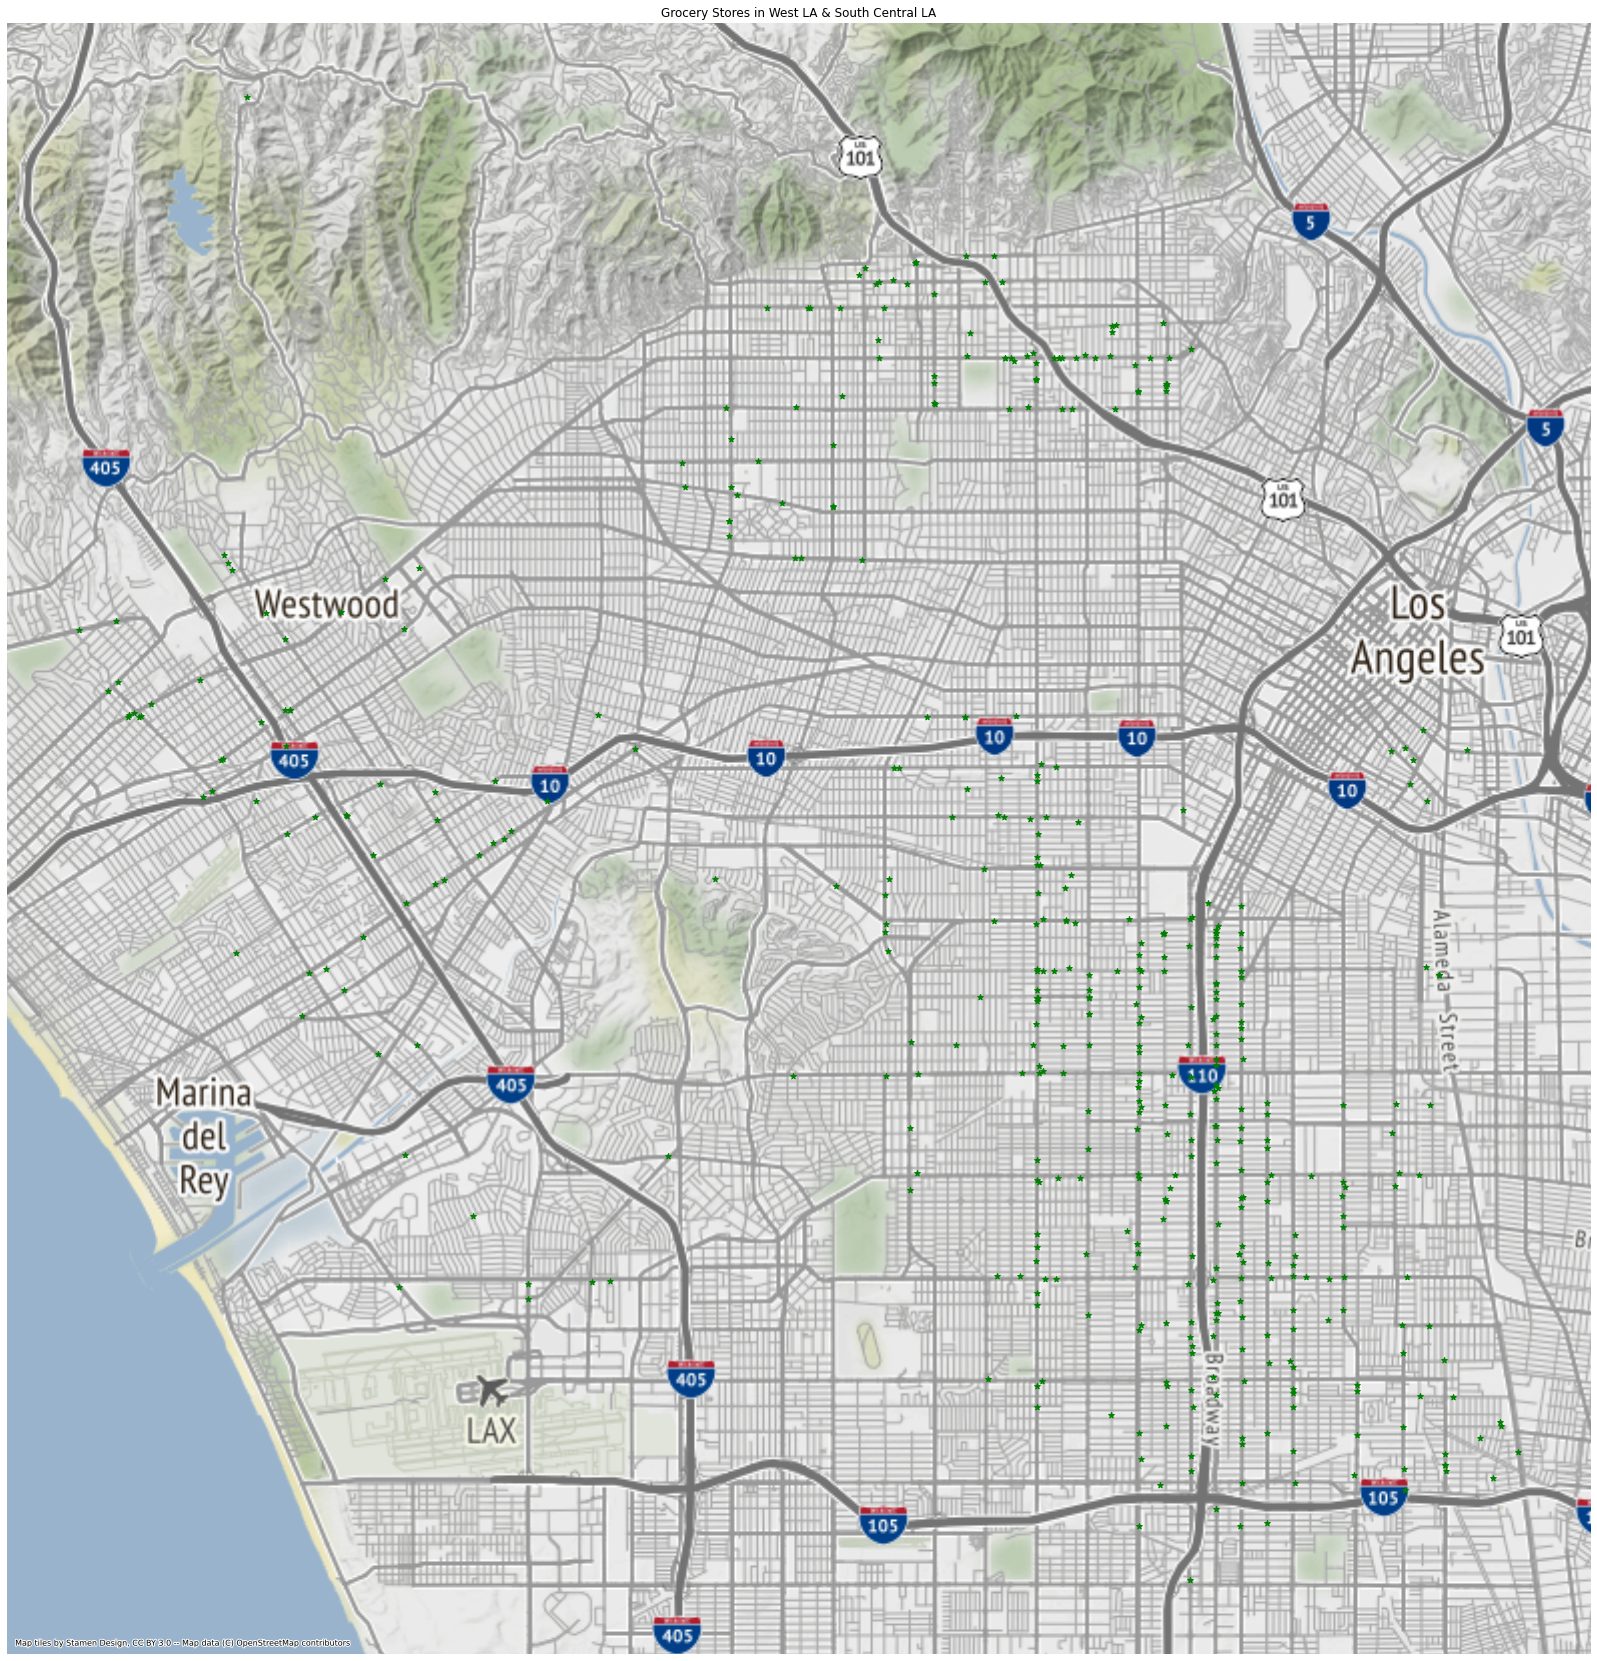

In [84]:

fig, ax = plt.subplots(figsize=(30,30))

gdf_web_mercator.plot(ax=ax, marker='*', color='green')

ax.axis('off')

ax.set_title('Grocery Stores in West LA & South Central LA')

ctx.add_basemap(ax)

In [85]:
import folium

In [86]:
m = folium.Map()
m

In [87]:
for index, row in gdf.iterrows():
    print(row.latitude, row.longitude)

33.9846  -118.2564
33.9847  -118.2474
33.9806  -118.2481
33.9846  -118.2416
33.9745  -118.262
33.9736  -118.2564
33.9729  -118.2561
33.9717  -118.2567
33.9731  -118.2476
33.975  -118.2468
33.9746  -118.2435
33.9689  -118.2565
33.9673  -118.2564
33.9603  -118.265
33.9602  -118.2629
33.9599  -118.2589
33.9602  -118.2455
33.9493  -118.2462
33.9601  -118.2563
33.9541  -118.259
33.9554  -118.2564
33.9533  -118.2464
33.9532  -118.2418
33.9484  -118.2391
33.9432  -118.2432
33.9431  -118.2377
33.9448  -118.2541
33.9439  -118.2541
33.9395  -118.2296
33.939  -118.2294
33.9797  -118.2826
33.9886  -118.2826
33.9866  -118.2786
33.9854  -118.2783
33.9871  -118.2779
33.9874  -118.2782
33.984  -118.2739
33.9849  -118.2695
33.9817  -118.2784
33.9817  -118.2782
33.9814  -118.274
33.9795  -118.2742
33.9833  -118.2695
33.9773  -118.2826
33.9797  -118.2781
33.9763  -118.2783
33.9796  -118.2695
33.9785  -118.2695
33.9714  -118.2739
33.9716  -118.2736
33.9754  -118.2739
33.9747  -118.2688
33.9737  -118.2695


In [89]:
m = folium.Map(location=[34.050253921905316, -118.29062251089758], width=750, height=500)
for index, row in gdf.iterrows():
    # add folium marker code
    folium.Marker([row.latitude, row.longitude]).add_to(m)
m